In [1]:
import re
import string
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from indoNLP.preprocessing import replace_slang
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to C:\Users\TUF
[nltk_data]     Gaming\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download daftar stopword (jalankan ini sekali)
nltk.download('stopwords')
nltk.download('punkt')

# Contoh kalimat
sentence = "negeri ini sudah tidak dihargai diajang internasional mungkin terlalu banyak berita ketidak adilan serta korupsi  koruptor"

# Tokenisasi
words = word_tokenize(sentence)

# Mengambil daftar stopword bahasa Inggris dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Menghapus stopword
filtered_words = [word for word in words if word.lower() not in stop_words]

print("Original Sentence:", sentence)
print("After Stopword Removal:", ' '.join(filtered_words))


[nltk_data] Downloading package stopwords to C:\Users\TUF
[nltk_data]     Gaming\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\TUF
[nltk_data]     Gaming\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Original Sentence: negeri ini sudah tidak dihargai diajang internasional mungkin terlalu banyak berita ketidak adilan serta korupsi  koruptor
After Stopword Removal: negeri dihargai diajang internasional berita ketidak adilan korupsi koruptor


In [4]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Contoh kalimat
kalimat = "negeri dihargai diajang internasional berita ketidak adilan korupsi koruptor"

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Melakukan stemming
hasil_stem = stemmer.stem(kalimat)

print("Kalimat Asli:", kalimat)
print("Setelah Stemming:", hasil_stem)

Kalimat Asli: negeri dihargai diajang internasional berita ketidak adilan korupsi koruptor
Setelah Stemming: negeri harga ajang internasional berita tidak adil korupsi koruptor


In [13]:
df = pd.read_csv("korupp.csv", delimiter=';')
# df = df.sample(frac=1, random_state=SEED).reset_index(drop=True)   # For shuffle
print(df.head())

                       created_at    id_str  \
0  Fri Sep 15 13:00:02 +0000 2023  1,70E+18   
1  Fri Sep 15 12:03:47 +0000 2023  1,70E+18   
2  Fri Sep 15 09:33:27 +0000 2023  1,70E+18   
3  Fri Sep 15 06:04:33 +0000 2023  1,70E+18   
4  Fri Sep 15 06:02:20 +0000 2023  1,70E+18   

                                           full_text  quote_count  \
0  Eks Menteri BUMN Dahlan Iskan  memenuhi panggi...            0   
1  Dalam mencegah tindak pidana korupsi yang mara...            0   
2  Unit Tipikor Satreskrim Polrestabes Medan mela...            0   
3  Kejagung Akui Kesulitan Temukan Tersangka Koru...            0   
4  Usai menjalani sidang tuntutan di Pengadilan T...            0   

   reply_count  retweet_count  favorite_count lang user_id_str  \
0            0              0               0   in   375995332   
1            1              4              38   in    73309923   
2            0              0               0   in    9,89E+17   
3            1              0         

In [14]:
df = df.drop(columns=['created_at','id_str','quote_count','reply_count','retweet_count','favorite_count', 'lang','user_id_str','conversation_id_str','username','tweet_url'])
df.head(20)

,full_text,label
0,Eks Menteri BUMN Dahlan Iskan memenuhi panggi...,netral
1,Dalam mencegah tindak pidana korupsi yang mara...,positif
2,Unit Tipikor Satreskrim Polrestabes Medan mela...,positif
3,Kejagung Akui Kesulitan Temukan Tersangka Koru...,negatif
4,Usai menjalani sidang tuntutan di Pengadilan T...,netral
5,Money politik adalah praktik #korupsi dlm duni...,negatif
6,Kukar - Diskresi penggunaan Anggaran Diluar Pe...,netral
7,Mba Connie disuruh BOHONG? *Gambar Nemu Di T...,negatif
8,Respon Erick Thohir Soal Dugaan Korupsi Proyek...,netral
9,Agak serem tidak sih kalau lihat lorong-lorong...,negatif


In [15]:
df.isna().sum()

full_text    62
label        19
dtype: int64

In [16]:
df.loc[df.full_text.isna(), :]

,full_text,label
83,NaN,netral
164,NaN,negatif
177,NaN,negatif
235,NaN,netral
256,NaN,netral
...,...,...
1773,NaN,NaN
1777,NaN,NaN
1781,NaN,NaN
1783,NaN,NaN


In [17]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)
df

,full_text,label
0,Eks Menteri BUMN Dahlan Iskan memenuhi panggi...,netral
1,Dalam mencegah tindak pidana korupsi yang mara...,positif
2,Unit Tipikor Satreskrim Polrestabes Medan mela...,positif
3,Kejagung Akui Kesulitan Temukan Tersangka Koru...,negatif
4,Usai menjalani sidang tuntutan di Pengadilan T...,netral
...,...,...
1723,enaknya korupsi di negeri ini yak angkat aku j...,negatif
1724,Menurut Anda hukuman apa yang seharusnya dijat...,netral
1725,Informatika. Miris sekali melihat betapa licik...,positif
1726,"Informatika. Ternyata, mereka juga suka main k...",negatif


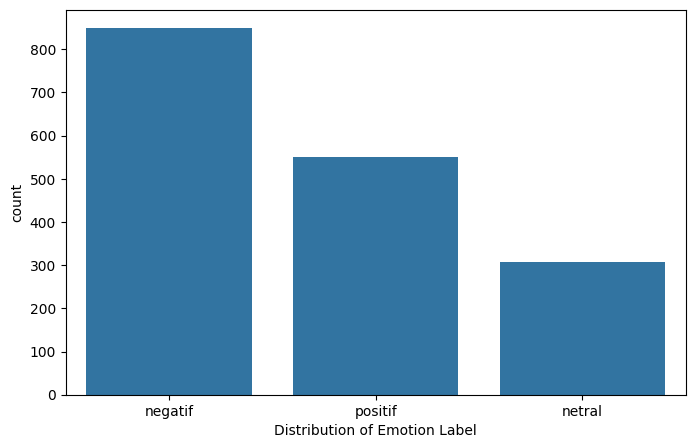

label
negatif    849
netral     308
positif    550
Name: count, dtype: int64

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xlabel('Distribution of Emotion Label')
plt.show()

df['label'].value_counts().sort_index()

In [32]:
df.full_text.duplicated().sum()

0

In [28]:
df = df.drop_duplicates(subset=["text_normalisasi"])
df.reset_index(drop=True, inplace = True)

In [31]:
df.text_normalisasi.duplicated().sum()

0

In [33]:
def text_cleaning(data):
    # lower text
    data = data.lower()
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    # remove newline
    data = data.replace('\n', ' ')
    # remove mentions
    data = re.sub(r'\@([\w]+)',' ', data)
    # hapus tagar
    data = re.sub(r'\#([\w]+)',' ', data)
    # remove simbol
    data = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', data)
    # remove url
    data = data.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
    # remove angka
    data = re.sub(r'[0-9]+','', data)
    # remove koreksi duplikasi tiga karakter beruntun atau lebih (contoh. yukkk)
    data = re.sub(r'([a-zA-Z])\1\1','\\1', data)
    # remove whitespaces
    data = re.sub(r'\s+', ' ', data).strip()
    # remove spasi ganda (atau lebih) menjadi satu spasi
    data = re.sub(' +', ' ', data)
    # remove spasi di awal dan akhir kalimat
    data = re.sub(r'^[ ]|[ ]$','', data)

    return data

In [39]:
df['text_normalisasi'] = df['text_normalisasi'].progress_apply(text_cleaning)
df

100%|███████████████████████████████████████████████████████████████████████████| 1707/1707 [00:00<00:00, 23772.56it/s]


,full_text,label,text_normalisasi
0,Eks Menteri BUMN Dahlan Iskan memenuhi panggi...,netral,eks menteri badan usaha milik negara dahlan is...
1,Dalam mencegah tindak pidana korupsi yang mara...,positif,dalam mencegah tindak pidana korupsi yang mara...
2,Unit Tipikor Satreskrim Polrestabes Medan mela...,positif,unit tipikor satreskrim polrestabes medan mela...
3,Kejagung Akui Kesulitan Temukan Tersangka Koru...,negatif,kejaksaan agung akui kesulitan temukan tersang...
4,Usai menjalani sidang tuntutan di Pengadilan T...,netral,usai menjalani sidang tuntutan di pengadilan t...
...,...,...,...
1702,enaknya korupsi di negeri ini yak angkat aku j...,negatif,enaknya korupsi di negeri ini ya angkat aku ja...
1703,Menurut Anda hukuman apa yang seharusnya dijat...,netral,menurut anda hukuman apa yang seharusnya dijat...
1704,Informatika. Miris sekali melihat betapa licik...,positif,informatika miris sekali melihat betapa licikn...
1705,"Informatika. Ternyata, mereka juga suka main k...",negatif,informatika ternyata mereka juga suka main kuc...


In [35]:
#replace slang word

# Menerapkan fungsi replace_slang pada kolom tertentu
df['text_normalisasi'] = df['text_normalisasi'].apply(lambda x: replace_slang(x))


In [40]:
df

,full_text,label,text_normalisasi
0,Eks Menteri BUMN Dahlan Iskan memenuhi panggi...,netral,eks menteri badan usaha milik negara dahlan is...
1,Dalam mencegah tindak pidana korupsi yang mara...,positif,dalam mencegah tindak pidana korupsi yang mara...
2,Unit Tipikor Satreskrim Polrestabes Medan mela...,positif,unit tipikor satreskrim polrestabes medan mela...
3,Kejagung Akui Kesulitan Temukan Tersangka Koru...,negatif,kejaksaan agung akui kesulitan temukan tersang...
4,Usai menjalani sidang tuntutan di Pengadilan T...,netral,usai menjalani sidang tuntutan di pengadilan t...
...,...,...,...
1702,enaknya korupsi di negeri ini yak angkat aku j...,negatif,enaknya korupsi di negeri ini ya angkat aku ja...
1703,Menurut Anda hukuman apa yang seharusnya dijat...,netral,menurut anda hukuman apa yang seharusnya dijat...
1704,Informatika. Miris sekali melihat betapa licik...,positif,informatika miris sekali melihat betapa licikn...
1705,"Informatika. Ternyata, mereka juga suka main k...",negatif,informatika ternyata mereka juga suka main kuc...


In [37]:
# Membuat kamus slang word
slang_words = {
    'gk': 'tidak',
    'gpp': 'tidak masalah',
    'gapapa': 'tidak masalah',
    'wkwk': 'haha',
    'lu': 'kamu',
    'gua': 'saya',
    'gue': 'saya',
    'gw': 'saya',
    'loe': 'kamu',
    'biar': 'supaya',
    'gak': 'tidak',
    'ga': 'tidak',
    'engga': 'tidak',
    'enggak': 'tidak',
    'ngga': 'tidak',
    'kaga': 'tidak',
    'kagak': 'tidak',
    'ane': 'saya',
    'ente': 'kamu',
    'gengs': 'teman',
    'guys': 'kawan',
    'asn': 'aparatur sipil negara',
    'tdk': 'tidak',
    'bentar': 'sebentar',
    'asu': 'anjing',
    'dll': 'dan lain-lain',
    'dsb': 'dan sebaginya',
    'amp': 'sampai',
    'sampe': 'sampai',
    'ampe': 'sampai',
    'ngelipet': 'melipat',
    'system': 'sistem',
    'id': 'indonesia',
    'day': 'hari',
    'korup': 'korupsi',
    'pusyeng': 'pusing',
    'kalo': 'kalau',
    'klo': 'kalau',
    'nutup': 'menutup',
    'duit': 'uang',
    'mulu': 'terus',
    'trus': 'terus',
    'trs': 'terus',
    'tros': 'terus',
    'teros': 'terus',
    'hoax': 'bohong',
    'boong': 'bohong',
    'hoak': 'bohong',
    'hoaks': 'bohong',
    'anu': 'sesuatu',
    'khabar': 'kabar',
    'kbar': 'kabar',
    'kbr': 'kabar',
    'kabr': 'kabar',
    'a': ' ',
    't': ' ',
    'rp': 'rupiah',
    'cuan': 'untung',
    'wapres': 'wakil presiden',
    'omong': 'berbicara',
    'ngomong': 'berbicara',
    'ngmong': 'berbicara',
    'bner': 'benar',
    'bnr': 'benar',
    'ngeri': 'menakutkan',
    'enteng': 'mudah',
    'gampang': 'mudah',
    'angel': 'sulit',
    'sirkel': 'lingkungan',
    'com': ' ',
    'takok': 'tanya',
    'takon': 'tanya',
    'bolo': 'teman',
    'iku': 'itu',
    'lapo': 'kenapa',
    'jek': 'masih',
    'mosok': 'masa',
    'mbuh': 'tidak tahu',
    'mbuhlah': 'tdak tahu',
    'luweh': 'lebih',
    'luwih': 'lebih',
    'sakpiro': 'seberapa',
    'barokah': 'berkah',
    'wes': 'sudah',
    'uwes': 'sudah',
    'wis': 'sudah',
    'update': 'pembaruan',
    'mustinya': 'semestinya',
    'anggep': 'anggap',
    'nganggep': 'anggap',
    'jane': 'sebenarnya',
    'tdak': 'tidak',
    'wong': 'orang',
    'intine': 'intinya',
    'tsk': 'tidak',
    'tdk': 'tidak',
    'support': 'mendukung',
    'role': 'peran',
    'co': ' ',
    'tu': 'itu',
    'ni': 'ini',
    'nih': 'ini',
    'skrng': 'sekarang',
    'bgt': 'banget',
    'sgt': 'sangat',
    'mah': 'itu',
    'dech': 'deh',
    'adl': 'adalah',
    'marah2': 'marah-marah',
    'mikir': 'berpikir',
    'dimana2': 'dimana-mana',
    'benar2': 'benar-benar',
    'bener2': 'benar-benar',
    'bener': 'benar',
    'utang': 'hutang',
    'kl': 'kalau',
    'ngk': 'tidak',
    'taun': 'tahun',
    'ortu': 'orang tua',
    'lg': 'lagi',
    'tp': 'tetapi',
    'tapi': 'tetapi',
    'indo': 'indonesia',
    'maruk': 'serakah',
    'tiap': 'setiap',
    'pake': 'pakai',
    'pke': 'pakai',
    'bangke': 'bangkai',
    'vangke': 'bangkai',
    'tsb': 'tersebut',
    'sdh': 'sudah',
    'SD': 'Sekolah Dasar',
    'SMP': 'Sekolah Menengah Pertama',
    'SMA': 'Sekolah Menengah Atas',
    'MA': 'Mahkamah Agung',
    'MK': 'Mahkamah Konstitusi',
    'KPK': 'Komisi Pemberantasan Korupsi',
    'OTT': 'Operasi Tangkap Tangan',
    'kab': 'kabupaten',
    'Kab': 'Kabupaten',
    'entar': 'nanti',
    'ntar': 'nanti',
    'sdg': 'sedang',
    'ngapai': 'sedang apa',
    'T': 'triliun',
    'M': 'miliar',
    'K': 'ribu',
    'rb': 'ribu',
    'RI': 'Republik Indonesia',
    'ri': 'Republik Indonesia',
    'DPR': 'Dewan Perwakilan Rakyat',
    'DPRD': 'Dewan Perwakilan Rakyat Daerah',
    'jd': 'jadi',
    '+62': 'indonesia',
    'DPP': 'Dewan Perwakilan Daerah',
    'polri': 'polisi republik indonesia',
    'gr': 'gram',
    'kkn': 'korupsi kolusi nepotisme',
    'tak': 'tidak',
    'jt': 'juta',
    'kejagung': 'kejaksaan agung',
    'negri': 'negeri',
    'thn': 'tahun',
    'th': 'tahun',
    'taun': 'tahun',
    'kimak': 'anjing',
    'dah': 'sudah',
    'sy': 'saya',
    'udh': 'sudah',
    'polda': 'polisi daerah',
    'bansos': 'bantuan sosial',
    'nyari': 'mencari',
    'parpol': 'partai politik',
    'nkri': 'negara kesatuan republik indonesia',
    'sulsel': 'sulawesi selatan',
    'bumn': 'badan usaha milik negara',
    'sda': 'sumber daya alam',
    'sdm': 'sumber daya manusia',
    'mabes': 'markas besar',
    'pns': 'pegawai negeri sipil',
    'fpi': 'front pembela islam',
    'ormas': 'oraganisasi masyarakat',
    'mpr': 'majelis permusyawaratan rakyat',
    'mensos': 'menteri sosial',
    'kemenkeu': 'kementerian keuangan',
    'pd': 'pada',
    'pda': 'pada',
    'kpd': 'kepada',
    'kemensos': 'kementerian sosial',
    'gede': 'besar',
    'sbg': 'sebagai',
    'uu': 'undang-undang',
    'plis': 'mohon',
    'taon': 'tahun',
    'ntr': 'nanti',
    'milyar': 'miliar',
    'trilyun': 'triliun',
    'no':'tidak',
    'wni': 'warga negara indonesia',
    'wna': 'warga negara asing',
    'ultah': 'ulang tahun',
    'tni': 'tentara nasional indonesia',
    'pemilu': 'pemilihan umum',
    'caleg': 'calon legislatif',
    'pilpres': 'pemilihan presiden',
    'tki': 'tenaga kerja indonesia',
    'ruu': 'rancangan undang-undang',
    'kec': 'kecamatan',
    'kep': 'kepulauan',
    'kades': 'kepala desa',
    'menkominfo': 'kementerian komunikasi dan informatika',
    'kominfo': 'komunikasi dan informatika',
    'kemnaker': 'kementerian ketenagakerjaan',
    'akpol': 'akademi polisi',
    'uns': 'universitas negeri sebelas maret',
    'pileg': 'pemilihan legislatif',
    'kg': 'kilogram',
    'kayak': 'seperti',
    'krn': 'karena',
    'dr': 'dari'
    # Tambahkan kata-kata slang dan penggantinya sesuai kebutuhan
}

# Fungsi untuk mengganti kata-kata slang dalam teks
def replace_slang_words(text, dictionary):
    words = text.split()
    converted_text = ' '.join([dictionary[word] if word in dictionary else word for word in words])
    return converted_text

# Mengganti kata-kata slang dalam kolom tertentu
df['text_normalisasi'] = df['text_normalisasi'].apply(lambda x: replace_slang_words(x, slang_words))


In [42]:
print(df['text_normalisasi'][1140])

hukum mereka yang mencoba merugikan negara tangkap mereka para korupsi uang rakyat korupsi


In [43]:
# Menyimpan DataFrame yang telah dimodifikasi kembali ke file CSV
df.to_csv('korupsi_uhuy.csv', index=False)

In [44]:
print(df.dtypes)

full_text           object
label               object
text_normalisasi    object
dtype: object
